In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
%matplotlib inline

In [2]:
np.random.seed(501) #once random starts generating from some same ref number, seq of randon no. ramains the same

#generate data

X = np.linspace(0, 15, 1000)
#Array of numbers (linespace/single dim) starting 0, max 15, 1000 numbers at equal interval

y = 3*np.sin(X) + np.random.normal(1+X, .2, 1000)
#s = np.random.normal(mu, sigma, 1000), mu - mean, sigma - std dev, 1000 iterations
#while sin(X) will is nonlinear but direct derivation of X, random element is not

In [3]:
#z= 3*np.sin(X) + np.random.normal(1+X, .2, 1000)

In [4]:
train_X, train_y = X[:700], y[:700]
test_X, test_y = X [700:], y[700:]

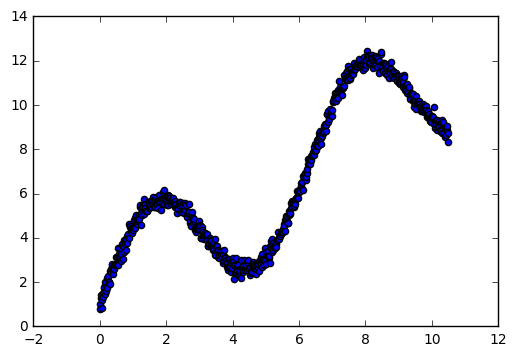

In [5]:
plt.scatter(train_X, train_y)

In [7]:
train_df=pd.DataFrame({'X': train_X, 'y':train_y})
test_df = pd.DataFrame({'X': test_X, 'y':test_y})

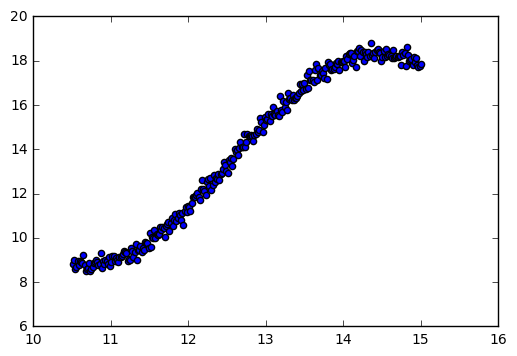

In [8]:
plt.scatter(test_df.X, test_df.y)

In [9]:
#train_df.head()
#test_df.tail()

In [10]:
poly_1=smf.ols(formula = 'y ~ 1 + X', data=train_df).fit()
poly_2 = smf.ols(formula = 'y ~ 1 + X + I(X**2)', data = train_df).fit()

In [11]:
poly_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1233.
Date:                Thu, 12 Jan 2017   Prob (F-statistic):          2.08e-156
Time:                        03:53:08   Log-Likelihood:                -1483.8
No. Observations:                 700   AIC:                             2972.
Df Residuals:                     698   BIC:                             2981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0342      0.152     13.347      0.000         1.735     2.333
X              0.8830      0.025     35.119      0.000         0.834     0.932
==============================================================================
Omnibus:                      535.159   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.642
Skew:                          -0.259   Prob(JB):                     1.01e-11
Kurtosis:                       1.788   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
'''model.params is is a pandas.Series. Accessing as attribute is only possible if the name of the 
entry is a valid python name.
In this case you need to index with the name in quotes, i.e. model.params["C[T.foo]"]'''
#poly_1.params
poly_1.params[0]

2.034226100153067

In [13]:
# a funtion that takes parameters and gies y values
#def test_poly_1(a, b):
def test_model(param_s, serie_s):
    lst=[]
    for i in range(len(test_df)):
        #lst.append(poly_1.params[0] + poly_1.params[1]*test_df['X'][i])
        lst.append(param_s[0] + param_s[1]*serie_s['X'][i])
    return lst

In [14]:
#z = test_poly_1()
z = test_model(poly_1.params, test_df)
z[290:]

[15.159557229161203,
 15.172815139392524,
 15.186073049623845,
 15.199330959855166,
 15.212588870086488,
 15.225846780317809,
 15.23910469054913,
 15.252362600780453,
 15.265620511011774,
 15.278878421243094]

In [15]:
test_df.y.tail()

295    18.132283
296    17.828565
297    17.695940
298    17.751827
299    17.841579
Name: y, dtype: float64

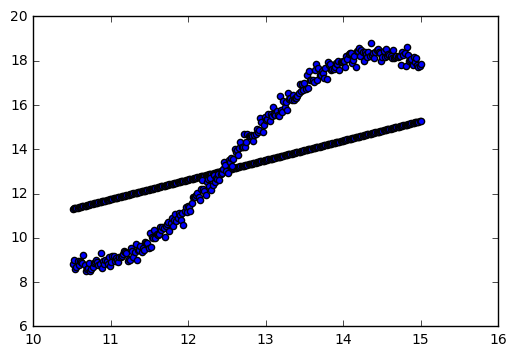

In [16]:
#plotting the regression line along with original
plt.scatter(test_df.X, z)
plt.scatter(test_df.X, test_df.y)

In [17]:
poly_2.params

Intercept    3.180164
X            0.226935
I(X ** 2)    0.062507
dtype: float64

In [18]:
#A function for higher order function
#def test_poly_1(a, b):
def test_model_2(param_s, serie_s):
    lst=[]
    for i in range(len(test_df)):
        #lst.append(poly_1.params[0] + poly_1.params[1]*test_df['X'][i])
        lst.append(param_s[0] + param_s[1]*serie_s['X'][i]+param_s[2]*(serie_s['X'][i]**2))
    return lst

In [19]:
k=test_model_2(poly_2.params, test_df)
k[290:]

[20.365326818465487,
 20.396650971657792,
 20.428003309316495,
 20.459383831441592,
 20.490792538033091,
 20.522229429090988,
 20.553694504615279,
 20.585187764605976,
 20.616709209063064,
 20.648258837986553]

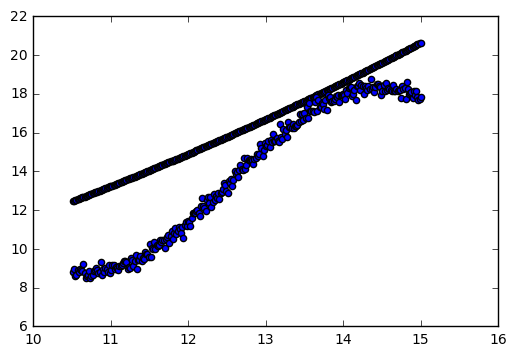

In [21]:
plt.scatter(test_df.X, k)
plt.scatter(test_df.X, test_df.y)
#the line is worse off than than simple linear regression

In [23]:
#taking difference between two models
diff=[]
for i in range (len(z)):
    diff.append(z[i]-k[i])
    
diff[-5:]

[-5.2963826487731787,
 -5.3145898140661494,
 -5.3328251638255235,
 -5.3510886980512904,
 -5.3693804167434589]

In [30]:
resid = z - test_df['y']

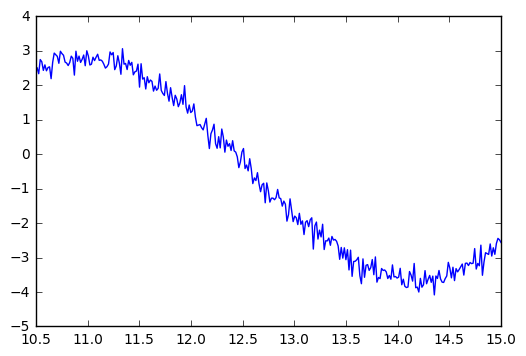

In [32]:
plt.plot(test_df['X'], resid)

In [24]:
from sklearn.metrics import mean_squared_error

#(mean_squared_error(test_y, y_pred1)
mean_squared_error(test_df.y, z)

6.5776849714920305

In [25]:
mean_squared_error(test_df.y, k)

7.7157118497804174

Summary:
    
First model with simple linear regression is definitely a better fit, second one does not mimics the original trend
Not getting a non linear graph despite using second order equation